<a href="https://colab.research.google.com/github/Jyotibaberwal/Ml_Algo_Implementations/blob/master/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [26]:
## Load the dataset
df = pd.read_csv('/content/Breast_Cancer.csv')

In [6]:
## Anlysing the dataset
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [52]:
## Conversion of String datatype to one hot encoding
categorical_features = [
    'Race', 'Marital Status', 'T Stage ','N Stage', '6th Stage','A Stage','Grade',
    'differentiate', 'Estrogen Status', 'Progesterone Status'
]

In [53]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [54]:
## Description
df.describe()


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [55]:
## Applying Decision tree for prediction
from sklearn.metrics import accuracy_score

In [56]:
## features name
print(df.columns)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [57]:
X = df_encoded.drop('Status', axis=1)
y = df['Status'].map({'Alive': 0, 'Dead': 1})  # Target variable


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [64]:
from sklearn.tree import DecisionTreeClassifier
Decision_tree = DecisionTreeClassifier()
Decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.40473585548961116, 0.975, 'x[4] <= 47.5\ngini = 0.259\nsamples = 3219\nvalue = [2726.0, 493.0]'),
 Text(0.09045393858477971, 0.925, 'x[28] <= 0.5\ngini = 0.398\nsamples = 376\nvalue = [103, 273]'),
 Text(0.24759489703719545, 0.95, 'True  '),
 Text(0.0260347129506008, 0.875, 'x[27] <= 0.5\ngini = 0.2\nsamples = 142\nvalue = [16, 126]'),
 Text(0.00801068090787717, 0.825, 'x[1] <= 5.5\ngini = 0.095\nsamples = 80\nvalue = [4, 76]'),
 Text(0.0053404539385847796, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.010680907877169559, 0.775, 'x[2] <= 28.5\ngini = 0.073\nsamples = 79\nvalue = [3, 76]'),
 Text(0.0053404539385847796, 0.725, 'x[16] <= 0.5\ngini = 0.051\nsamples = 76\nvalue = [2, 74]'),
 Text(0.0026702269692923898, 0.675, 'gini = 0.0\nsamples = 59\nvalue = [0, 59]'),
 Text(0.00801068090787717, 0.675, 'x[1] <= 23.0\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(0.0053404539385847796, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.010680907877169559

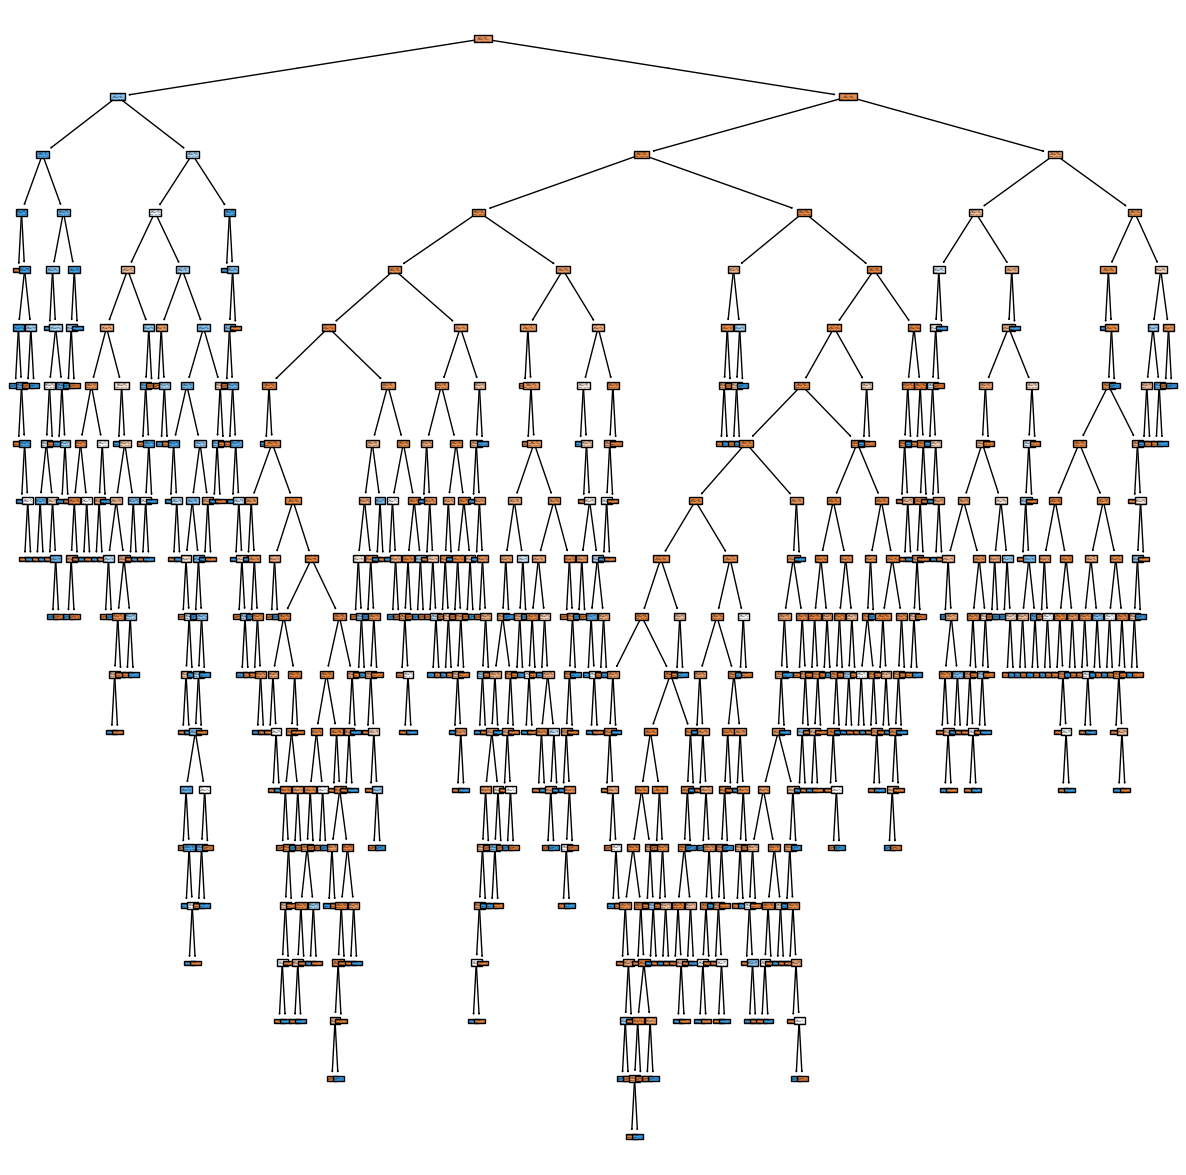

In [61]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(Decision_tree,filled=True)

In [68]:
## Analyzing test and train accuracy
y_pred_train = Decision_tree.predict(X_train)
y_pred_test = Decision_tree.predict(X_test)

from sklearn import metrics
print("Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.8335403726708075


#### Analysis
 Training Accuracy : 100 %, Testing Accuracy : 83.35%
 Hence overfitting, lets play with hyperparameters

In [81]:
## Preprunning
model = DecisionTreeClassifier(max_depth=7,min_samples_leaf=40)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=40)

[Text(0.43403291420118345, 0.9545454545454546, 'x[4] <= 47.5\ngini = 0.259\nsamples = 3219\nvalue = [2726.0, 493.0]'),
 Text(0.12983851084812623, 0.8636363636363636, 'x[28] <= 0.5\ngini = 0.398\nsamples = 376\nvalue = [103, 273]'),
 Text(0.2819357125246548, 0.9090909090909092, 'True  '),
 Text(0.038461538461538464, 0.7727272727272727, 'x[27] <= 0.5\ngini = 0.2\nsamples = 142\nvalue = [16, 126]'),
 Text(0.011834319526627219, 0.6818181818181818, 'x[1] <= 5.5\ngini = 0.095\nsamples = 80\nvalue = [4, 76]'),
 Text(0.007889546351084813, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.015779092702169626, 0.5909090909090909, 'x[2] <= 28.5\ngini = 0.073\nsamples = 79\nvalue = [3, 76]'),
 Text(0.007889546351084813, 0.5, 'x[16] <= 0.5\ngini = 0.051\nsamples = 76\nvalue = [2, 74]'),
 Text(0.0039447731755424065, 0.4090909090909091, 'gini = 0.0\nsamples = 59\nvalue = [0, 59]'),
 Text(0.011834319526627219, 0.4090909090909091, 'x[1] <= 23.0\ngini = 0.208\nsamples = 17\nvalue = 

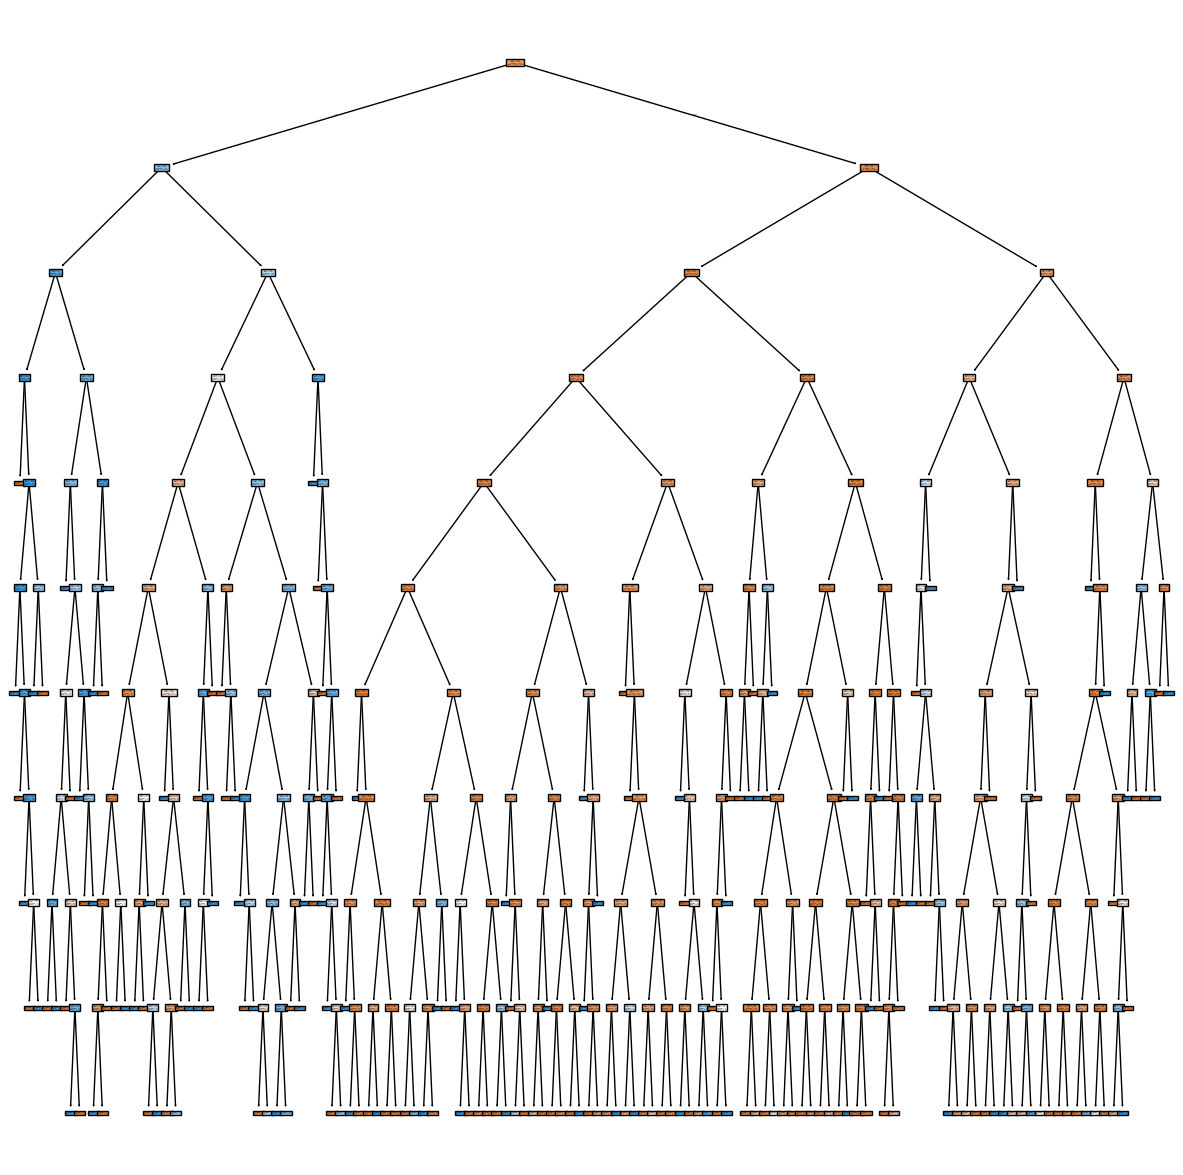

In [70]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,filled=True)

In [82]:
## Analyzing test and train accuracy
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

from sklearn import metrics
print("Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.9074246660453557
Test Accuracy: 0.9043478260869565


### Hypertuning with the help of grid search cv


In [83]:
## try out with gridsearchcv
from sklearn.model_selection import GridSearchCV

params ={
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
}

grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=5)
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [84]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 7,
 'splitter': 'random'}

In [85]:
## Analyzing test and train accuracy
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

from sklearn import metrics
print("Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.8984156570363467
Test Accuracy: 0.8819875776397516
